In [1]:
#importing libraries
import pandas as pd
import numpy as np

#Remove font warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore", category=PendingDeprecationWarning)

In [2]:
# Read Client csv file
client_df = pd.read_csv("data/CLIENT_INFO_VSAMKSDS.csv")
client_df = client_df.set_index("CONT_ID")
client_df

,Unnamed: 0,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN
CONT_ID,,,,,,,,
1009548420,0,0,35.88,1,0.0,17054.0,3,0
1009548430,1,1,41.45,1,0.0,13180.0,4,0
1009548440,2,0,57.86,4,0.0,21009.0,2,0
1009548450,3,1,34.14,1,0.0,20766.0,4,1
1009548460,4,1,41.89,4,0.0,22140.0,4,0
1009548470,5,0,33.18,1,0.0,20564.0,1,1
1009548480,6,0,44.80,1,0.0,21858.0,1,1
1009548490,7,0,68.87,1,0.0,37425.0,1,1
1009548500,8,1,80.13,4,0.0,17753.0,2,0


In [3]:
#Appending the credit transactions
txn_df = pd.read_csv("data/SPPAYTB_VSAM-1.csv")
txn_df2 = pd.read_csv("data/SPPAYTB_VSAM-2.csv")
txn_df = txn_df.append(txn_df2)
txn_df3 = pd.read_csv("data/SPPAYTB_VSAM-3.csv")
txn_final = txn_df.append(txn_df3)

In [4]:
txn_final.dtypes

Unnamed: 0                int64
HDR_CREDTT               object
AUREQ_ENV_A_ID_ID        object
AUREQ_ENV_M_ID_ID        object
AUREQ_ENV_M_CMONNM       object
AUREQ_ENV_CPL_PAN         int64
AUREQ_ENV_C_CARDBRND     object
AUREQ_TX_MRCHNTCTGYC      int64
AUREQ_TX_DT_TTLAMT      float64
CONT_ID                   int64
MDM_POSTAL_CODE_ID       object
AGE                       int64
AUTHORRESULT_RSPNT       object
FRAUD_VER_RESULT         object
FILLER1                  object
dtype: object

In [5]:
txn_final['HDR_CREDTT'] = pd.to_datetime(txn_final['HDR_CREDTT'])
txn_final['DATE'] = txn_final['HDR_CREDTT'].apply(lambda x: x.date())
txn_final

,Unnamed: 0,HDR_CREDTT,AUREQ_ENV_A_ID_ID,AUREQ_ENV_M_ID_ID,AUREQ_ENV_M_CMONNM,AUREQ_ENV_CPL_PAN,AUREQ_ENV_C_CARDBRND,AUREQ_TX_MRCHNTCTGYC,AUREQ_TX_DT_TTLAMT,CONT_ID,MDM_POSTAL_CODE_ID,AGE,AUTHORRESULT_RSPNT,FRAUD_VER_RESULT,FILLER1,DATE
0,0,2013-03-27 17:05:42.000000000,BancaItaliana,C0120580915711418,AllFood,1009577753,Debit Card,5711,65.27,1009577750,C012058091,48,APPR,N,,2013-03-27
1,1,2013-03-27 17:05:46.000000000,BancaItaliana,C01908402757117,TuttoePiu,1009568273,Debit Card,5711,70.88,1009568270,C019084027,65,APPR,N,,2013-03-27
2,2,2013-03-27 17:05:49.000000000,BancaItaliana,C00301520557116,Incrocio,1009530123,Debit Card,5711,65.54,1009530120,C003015205,58,APPR,N,,2013-03-27
3,3,2013-03-27 17:05:50.000000000,BancaItaliana,C01205801857111,TuttoePiu,1009555853,Debit Card,5711,52.34,1009555850,C012058018,32,APPR,N,,2013-03-27
4,4,2013-03-27 17:05:55.000000000,BancaItaliana,C01506200757111,Incrocio,1009559023,Debit Card,5711,61.27,1009559020,C015062007,57,APPR,N,,2013-03-27
5,5,2013-03-27 17:05:58.000000000,BancaItaliana,C01807807157111,Incrocio,1009563303,Debit Card,5711,50.20,1009563300,C018078071,36,APPR,N,,2013-03-27
6,6,2013-03-27 17:05:58.000000001,BancaItaliana,C006030129571131,TuttoePiu,1009570193,Debit Card,5711,63.94,1009570190,C006030129,32,APPR,N,,2013-03-27
7,7,2013-03-27 17:06:02.000000000,BancaItaliana,C01506206457111,Incrocio,1009558653,Debit Card,5711,123.94,1009558650,C015062064,62,APPR,N,,2013-03-27
8,8,2013-03-27 17:06:12.000000000,BancaItaliana,C0190820535711244,AllFood,1009541493,Debit Card,5711,81.62,1009541490,C019082053,60,APPR,N,,2013-03-27
9,9,2013-03-27 17:06:16.000000000,BancaItaliana,C0120580915711588,TuttoePiu,1009543343,Debit Card,5711,36.17,1009543340,C012058091,56,APPR,N,,2013-03-27


In [6]:
txn_final.drop('Unnamed: 0',axis=1, inplace=True)

In [7]:
txn_final

,HDR_CREDTT,AUREQ_ENV_A_ID_ID,AUREQ_ENV_M_ID_ID,AUREQ_ENV_M_CMONNM,AUREQ_ENV_CPL_PAN,AUREQ_ENV_C_CARDBRND,AUREQ_TX_MRCHNTCTGYC,AUREQ_TX_DT_TTLAMT,CONT_ID,MDM_POSTAL_CODE_ID,AGE,AUTHORRESULT_RSPNT,FRAUD_VER_RESULT,FILLER1,DATE
0,2013-03-27 17:05:42.000000000,BancaItaliana,C0120580915711418,AllFood,1009577753,Debit Card,5711,65.27,1009577750,C012058091,48,APPR,N,,2013-03-27
1,2013-03-27 17:05:46.000000000,BancaItaliana,C01908402757117,TuttoePiu,1009568273,Debit Card,5711,70.88,1009568270,C019084027,65,APPR,N,,2013-03-27
2,2013-03-27 17:05:49.000000000,BancaItaliana,C00301520557116,Incrocio,1009530123,Debit Card,5711,65.54,1009530120,C003015205,58,APPR,N,,2013-03-27
3,2013-03-27 17:05:50.000000000,BancaItaliana,C01205801857111,TuttoePiu,1009555853,Debit Card,5711,52.34,1009555850,C012058018,32,APPR,N,,2013-03-27
4,2013-03-27 17:05:55.000000000,BancaItaliana,C01506200757111,Incrocio,1009559023,Debit Card,5711,61.27,1009559020,C015062007,57,APPR,N,,2013-03-27
5,2013-03-27 17:05:58.000000000,BancaItaliana,C01807807157111,Incrocio,1009563303,Debit Card,5711,50.20,1009563300,C018078071,36,APPR,N,,2013-03-27
6,2013-03-27 17:05:58.000000001,BancaItaliana,C006030129571131,TuttoePiu,1009570193,Debit Card,5711,63.94,1009570190,C006030129,32,APPR,N,,2013-03-27
7,2013-03-27 17:06:02.000000000,BancaItaliana,C01506206457111,Incrocio,1009558653,Debit Card,5711,123.94,1009558650,C015062064,62,APPR,N,,2013-03-27
8,2013-03-27 17:06:12.000000000,BancaItaliana,C0190820535711244,AllFood,1009541493,Debit Card,5711,81.62,1009541490,C019082053,60,APPR,N,,2013-03-27
9,2013-03-27 17:06:16.000000000,BancaItaliana,C0120580915711588,TuttoePiu,1009543343,Debit Card,5711,36.17,1009543340,C012058091,56,APPR,N,,2013-03-27


In [8]:
#Total transactions per customer
total_txn = txn_final.groupby('CONT_ID').size().rename("TOTAL_TXNS").to_frame()
client_df = client_df.join(total_txn)

In [9]:
#Total transaction amount per customer
total_txn_amt = txn_final.groupby('CONT_ID')['AUREQ_TX_DT_TTLAMT'].sum().rename("TXN_AMT").to_frame()
client_df = client_df.join(total_txn_amt)

In [10]:
# Avg transaction amounts per customer
avg_txn_amount = txn_final.groupby('CONT_ID')['AUREQ_TX_DT_TTLAMT'].mean().rename("AVG_TXN_AMOUNT").to_frame()
client_df = client_df.join(avg_txn_amount)

In [11]:
# Average daily txns per customer
daily_txns = txn_final.groupby(['DATE', 'CONT_ID']).size()

In [12]:
# Missing txns on a particular day means customer had none.
# These days should be included in the avg as 0 transaction days.
avg_daily_txns = daily_txns.unstack().fillna(0).mean().rename("AVG_DAILY_TXNS").to_frame()
client_df = client_df.join(avg_daily_txns)

In [13]:
#Results
client_df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [14]:
#Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style(style='whitegrid')

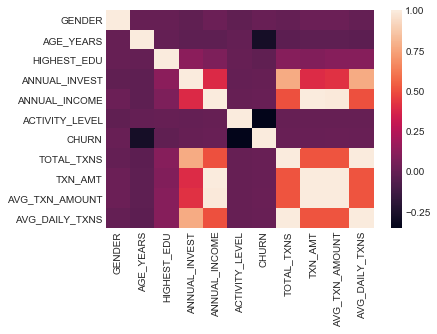

In [15]:
corr = client_df.corr()
sns.heatmap(corr)

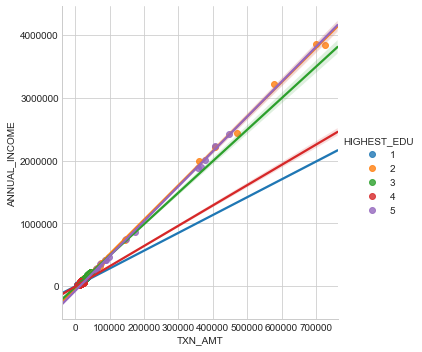

In [16]:
sns.lmplot(x='TXN_AMT', y='ANNUAL_INCOME',data=client_df, hue='HIGHEST_EDU')

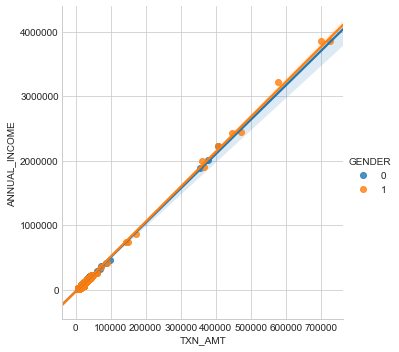

In [17]:
sns.lmplot(x='TXN_AMT', y='ANNUAL_INCOME',data=client_df, hue='GENDER')

C:\Users\Rohini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Rohini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


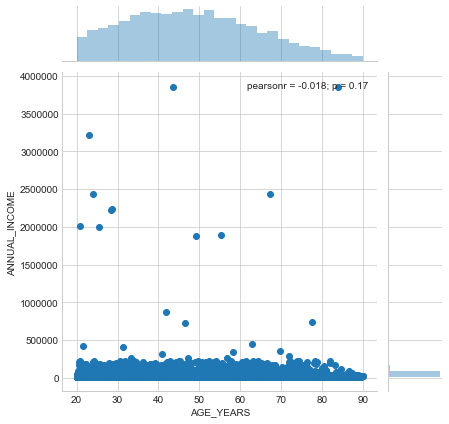

In [18]:
sns.jointplot('AGE_YEARS','ANNUAL_INCOME', data=client_df)

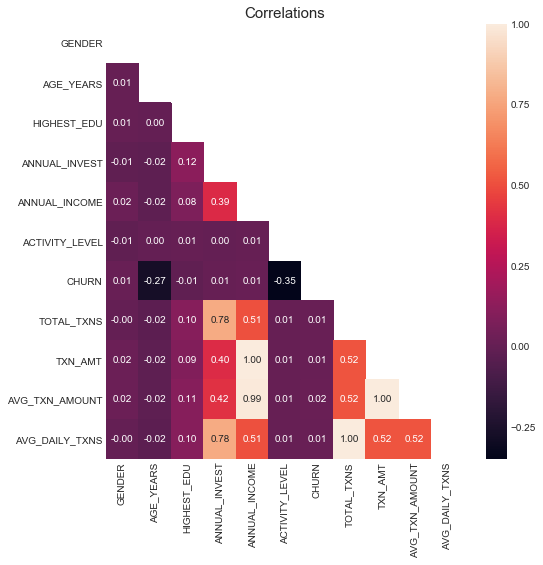

In [19]:
corr = client_df.corr()
#only the lower triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(corr, mask=mask, annot=True, fmt='.2f',ax=ax)
title = ax.set_title('Correlations', size=15)

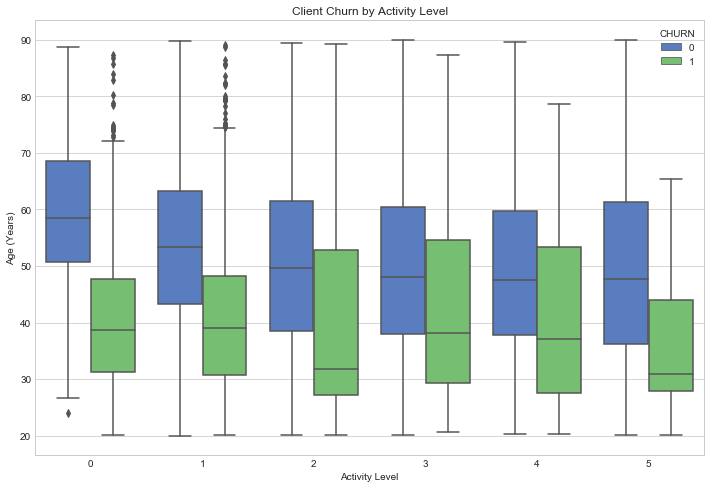

In [20]:
#distribution of clients who churned and didnot churn in the same axis
col = 'AGE_YEARS'
f, ax = plt.subplots(figsize=(12,8))
ax = sns.boxplot(x='ACTIVITY_LEVEL', y=col, hue="CHURN", data=client_df, 
                 palette='muted', ax=ax)
title = ax.set_title('Client Churn by Activity Level')
label = ax.set_ylabel('Age (Years)')
label = ax.set_xlabel('Activity Level')
handles, labels = ax.get_legend_handles_labels()

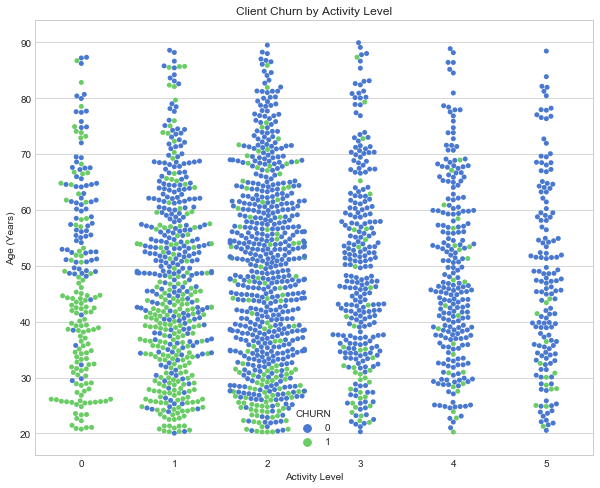

In [21]:
f, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x='ACTIVITY_LEVEL', y='AGE_YEARS', hue='CHURN', 
                   data=client_df.sample(n=2000, random_state=51), 
                   palette='muted', ax=ax, kind="violin")
title = ax.set_title('Client Churn by Activity Level')
label = ax.set_ylabel('Age (Years)')
label = ax.set_xlabel('Activity Level')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

C:\Users\Rohini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
#splitting data into train and test sets
train_index, test_index = train_test_split(client_df.index, random_state=99)
train_df = client_df.ix[train_index]
test_df = client_df.ix[test_index]

#target variable in training set
train_y = np.array(train_df['CHURN'])

#extracting features in training set
train_features_df = train_df.drop(['CHURN','CUSTOMER_ID'],axis=1, errors ='ignore')
train_x = train_features_df.as_matrix().astype(np.float)
scalar = StandardScaler()
train_x = scalar.fit_transform(train_x)

#target variable in test set
test_y = np.array(test_df['CHURN'])

#extracting features in test set
test_features_df = test_df.drop(['CHURN','CUSTOMER_ID'],axis=1, errors ='ignore')
test_x =test_features_df.as_matrix().astype(np.float)
test_x = scalar.transform(test_x)

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)


(4500, 10) (4500,)
(1501, 10) (1501,)


In [24]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RF
clf1 = RF(n_estimators=100)
clf1.fit(train_x, train_y)
pred_RF = clf1.predict_proba(test_x)[:,1]

#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as KNC
clf2 = KNC(n_neighbors=100)
clf2.fit(train_x, train_y)
pred_KNC = clf2.predict_proba(test_x)[:,1]

#AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier as ABC
clf3 = ABC(n_estimators=100)
clf3.fit(train_x, train_y)
pred_ABC = clf3.predict_proba(test_x)[:,1]

#SVC
from sklearn.svm import SVC
clf4 = SVC(gamma='auto', probability=True)
clf4.fit(train_x, train_y)
pred_SVC = clf4.predict_proba(test_x)[:,1]

#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
clf5 = DTC(random_state=0)
clf5.fit(train_x,train_y)
pred_DTC = clf5.predict_proba(test_x)[:,1]

In [25]:
print(pred_RF.shape)
print(pred_KNC.shape)
print(pred_ABC.shape)
print(pred_SVC.shape)
print(pred_DTC.shape)

(1501,)
(1501,)
(1501,)
(1501,)
(1501,)


In [43]:
output_df = test_df.copy()

In [45]:
output_df['churn_proba_RF'] = pred_RF
output_df['churn_proba_KNC'] = pred_KNC
output_df['churn_proba_ABC'] = pred_ABC
output_df['churn_proba_SVC'] = pred_SVC
output_df['churn_proba_DTC'] = pred_DTC

In [46]:
output_df.head()

,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN,TOTAL_TXNS,TXN_AMT,AVG_TXN_AMOUNT,AVG_DAILY_TXNS,churn_proba_RF,churn_proba_KNC,churn_proba_ABC,churn_proba_SVC,churn_proba_DTC
CONT_ID,,,,,,,,,,,,,,,,
1009559550,0,39.61,4,0.0,15161.0,1,1,241,7355.69,30.521535,0.658470,0.56,0.35,0.499658,0.379621,1.0
1009524820,0,35.80,1,0.0,24146.0,4,0,244,10099.05,41.389549,0.666667,0.20,0.14,0.495078,0.116811,0.0
1009532290,0,25.25,1,0.0,22954.0,1,1,239,9489.02,39.703013,0.653005,0.62,0.66,0.502468,0.819447,1.0
1009556780,0,55.31,1,0.0,22156.0,1,1,243,9449.10,38.885185,0.663934,0.25,0.24,0.497373,0.161731,0.0
1009521050,0,38.17,1,0.0,15615.0,4,0,243,7513.26,30.918765,0.663934,0.00,0.09,0.492959,0.123614,0.0


In [48]:
avg_daily_balance = output_df['ANNUAL_INCOME']/6

deposit_rate = 0.02
credit_rate = 0.015
mgmt_rate = 0.02

#how much is each customer worth tothe business?
output_df['worth'] = deposit_rate * avg_daily_balance + \
        mgmt_rate * output_df['ANNUAL_INVEST'] + \
        credit_rate * output_df['TXN_AMT']

# for RandomForestClassifier
output_df['predicted_loss_RF'] = output_df['churn_proba_RF'] * output_df['worth']

#for KNeighborsClassifier
output_df['predicted_loss_KNC'] = output_df['churn_proba_KNC'] * output_df['worth']

#for AdaBoostClassifier
output_df['predicted_loss_ABC'] = output_df['churn_proba_ABC'] * output_df['worth']

#for SVC
output_df['predicted_loss_SVC'] = output_df['churn_proba_SVC'] * output_df['worth']

#for DecisionTreeClassifier
output_df['predicted_loss_DTC'] = output_df['churn_proba_DTC'] * output_df['worth']

In [50]:
output_df['AVG_PRED_LOSS'] = (output_df['predicted_loss_RF']+\
                             output_df['predicted_loss_KNC']+\
                             output_df['predicted_loss_ABC']+\
                             output_df['predicted_loss_SVC']+\
                             output_df['predicted_loss_DTC'])/ 5

In [54]:
output_df.sort_values(by='AVG_PRED_LOSS', ascending=False).head(20)

,GENDER,AGE_YEARS,HIGHEST_EDU,ANNUAL_INVEST,ANNUAL_INCOME,ACTIVITY_LEVEL,CHURN,TOTAL_TXNS,TXN_AMT,AVG_TXN_AMOUNT,...,churn_proba_ABC,churn_proba_SVC,churn_proba_DTC,worth,predicted_loss_RF,predicted_loss_KNC,predicted_loss_ABC,predicted_loss_SVC,predicted_loss_DTC,AVG_PRED_LOSS
CONT_ID,,,,,,,,,,,,,,,,,,,,,
1009534260,1,23.00,2,94881.0,3217364.0,1,1,336,579071.01,1723.425625,...,0.434988,0.357874,1.0,21308.231817,16194.256181,6605.551863,9268.819800,7625.659220,21308.231817,12200.503776
1009578040,1,77.60,5,90798.0,743981.0,0,0,361,148178.37,410.466399,...,0.438536,0.279823,1.0,6518.572217,3520.028997,1955.571665,2858.630647,1824.048320,6518.572217,3335.370369
1009572850,0,24.08,2,117746.0,127814.0,1,1,276,29691.62,107.578333,...,0.501851,0.615085,1.0,3226.340967,2613.336183,1322.799796,1619.142556,1984.474902,3226.340967,2153.218881
1009555500,1,28.52,2,105736.0,172740.0,1,0,314,38533.05,122.716720,...,0.502516,0.714818,1.0,3268.515750,2026.479765,1143.980513,1642.480830,2336.393105,3268.515750,2083.569993
1009574970,0,27.60,3,113262.0,160991.0,1,1,313,37587.46,120.087732,...,0.502516,0.720455,1.0,3365.688567,1783.814940,1144.334113,1691.311707,2424.828754,3365.688567,2081.995616
1009544970,1,41.68,3,111984.0,149500.0,0,1,272,32444.10,119.279779,...,0.503406,0.814599,1.0,3224.674833,1934.804900,999.649198,1623.321148,2626.817359,3224.674833,2081.853488
1009552030,0,31.70,2,79156.0,225412.0,1,1,316,47881.05,151.522310,...,0.502719,0.659856,1.0,3052.709083,2594.802721,1037.921088,1534.654787,2014.349525,3052.709083,2046.887441
1009531260,0,69.72,2,86927.0,357753.0,1,1,348,73524.86,211.278333,...,0.482295,0.249920,1.0,4033.922900,1936.282992,1290.855328,1945.541000,1008.157280,4033.922900,2042.951900
1009556820,0,22.26,3,118655.0,113950.0,1,1,272,26531.57,97.542537,...,0.548332,0.593084,1.0,3150.906883,2111.107612,1323.380891,1727.743722,1868.751350,3150.906883,2036.378091


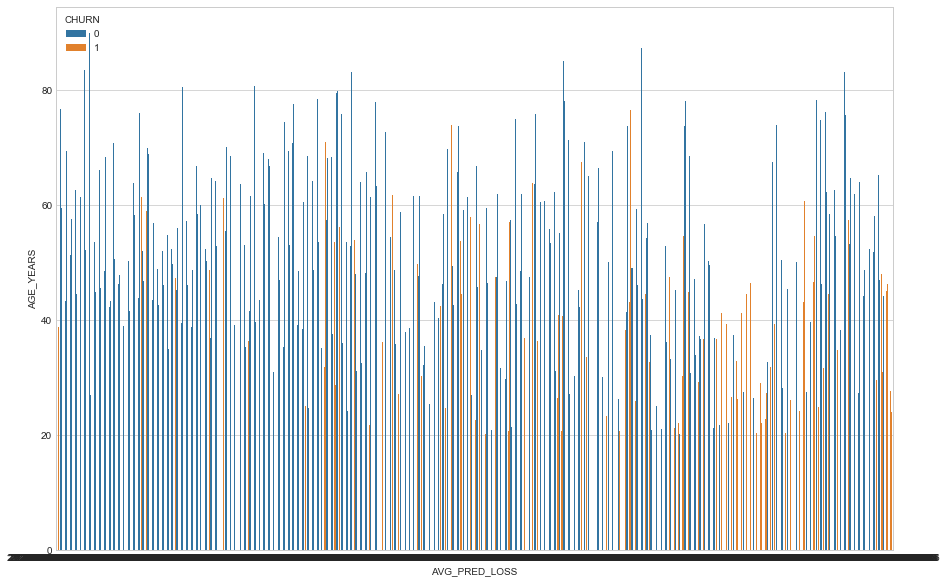

In [71]:
f,ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=output_df['AVG_PRED_LOSS'], y=output_df['AGE_YEARS'], hue=output_df['CHURN'])